In [1]:
import sys
sys.path.append("..")

from dataset.CustomDataset import CustomDataset
#import train
import train_model_no_WS
from datetime import datetime
from torch import nn
from architectures.SimpleConvNet import SimpleConvNet, SimpleConvNetDataset
import torch

In [2]:
training_set = CustomDataset('./data/mnist/', train=True, nb=100)

In [3]:
training_set.input.shape

torch.Size([100, 2, 14, 14])

In [4]:
len(training_set)

100

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_model_no_WS = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=SimpleConvNetDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=50,  # 250
    model=SimpleConvNet(class_num=10, channels_in=1), #'simple_conv',
    augmentation=False,
    verbose=1
)

model, history = train_model_no_WS.train(config_model_no_WS)

Reusing TensorBoard on port 6006 (pid 6033), started 5:16:16 ago. (Use '!kill 6033' to kill it.)

epoch [001] loss_train: 1.50e+00 loss_test: 6.80e-01 acc_train: 7.41e-01 acc_test: 8.34e-01
epoch [002] loss_train: 5.00e-01 loss_test: 3.78e-01 acc_train: 8.96e-01 acc_test: 9.28e-01
epoch [003] loss_train: 3.08e-01 loss_test: 3.19e-01 acc_train: 9.41e-01 acc_test: 9.31e-01
epoch [004] loss_train: 2.06e-01 loss_test: 2.41e-01 acc_train: 9.54e-01 acc_test: 9.61e-01
epoch [005] loss_train: 1.33e-01 loss_test: 2.06e-01 acc_train: 9.66e-01 acc_test: 9.54e-01
epoch [006] loss_train: 9.56e-02 loss_test: 1.85e-01 acc_train: 9.77e-01 acc_test: 9.58e-01
epoch [007] loss_train: 6.39e-02 loss_test: 2.07e-01 acc_train: 9.84e-01 acc_test: 9.57e-01
epoch [008] loss_train: 4.41e-02 loss_test: 1.78e-01 acc_train: 9.94e-01 acc_test: 9.59e-01
epoch [009] loss_train: 2.93e-02 loss_test: 1.84e-01 acc_train: 9.97e-01 acc_test: 9.69e-01
epoch [010] loss_train: 2.56e-02 loss_test: 1.83e-01 acc_train: 9.97e-01 acc_test: 9.66e-01
epoch [011] loss_train: 1.55e-02 loss_test: 1.67e-01 acc_train: 1.00e+00 acc_tes

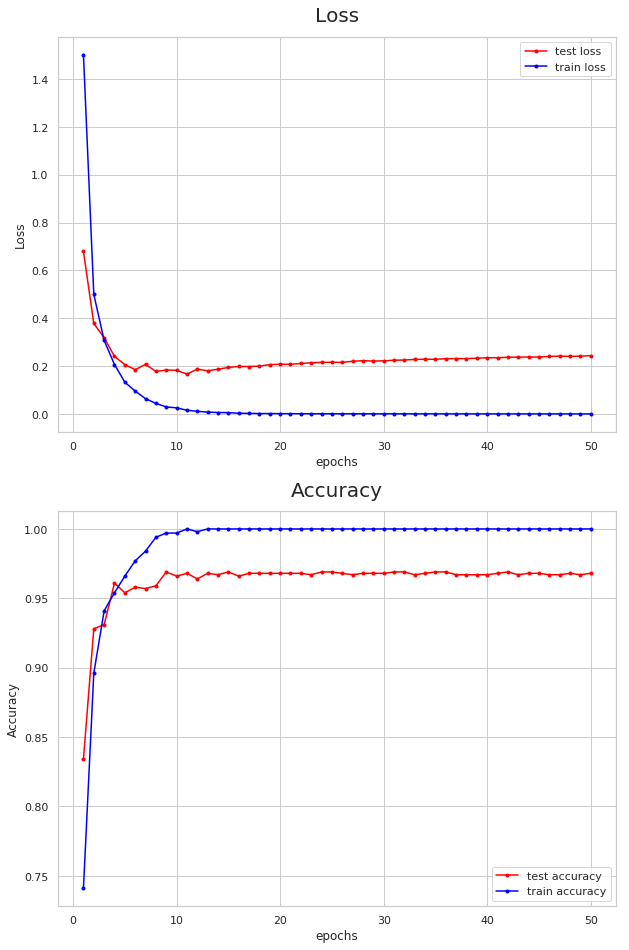

In [6]:
history.plot()

In [5]:
from architectures.Linear import LinearDataset, Linear

In [6]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_linear = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=LinearDataset,
    criterion=nn.MSELoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=50,  # 250
    model=Linear(), #'simple_conv',
    augmentation=False,
    verbose=1
)

model, history = train_model_no_WS.train(config_linear)

Reusing TensorBoard on port 6006 (pid 6033), started 5:48:59 ago. (Use '!kill 6033' to kill it.)

/home/jelena/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/jelena/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch [001] loss_train: 7.81e-01 loss_test: 4.56e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [002] loss_train: 5.54e-01 loss_test: 4.24e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [003] loss_train: 4.15e-01 loss_test: 4.41e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [004] loss_train: 4.00e-01 loss_test: 3.63e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [005] loss_train: 3.44e-01 loss_test: 3.34e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [006] loss_train: 3.34e-01 loss_test: 3.26e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [007] loss_train: 3.16e-01 loss_test: 3.18e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [008] loss_train: 3.09e-01 loss_test: 3.05e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [009] loss_train: 2.99e-01 loss_test: 2.97e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [010] loss_train: 2.93e-01 loss_test: 2.94e-01 acc_train: 4.53e-01 acc_test: 4.33e-01
epoch [011] loss_train: 2.89e-01 loss_test: 2.87e-01 acc_train: 4.53e-01 acc_tes

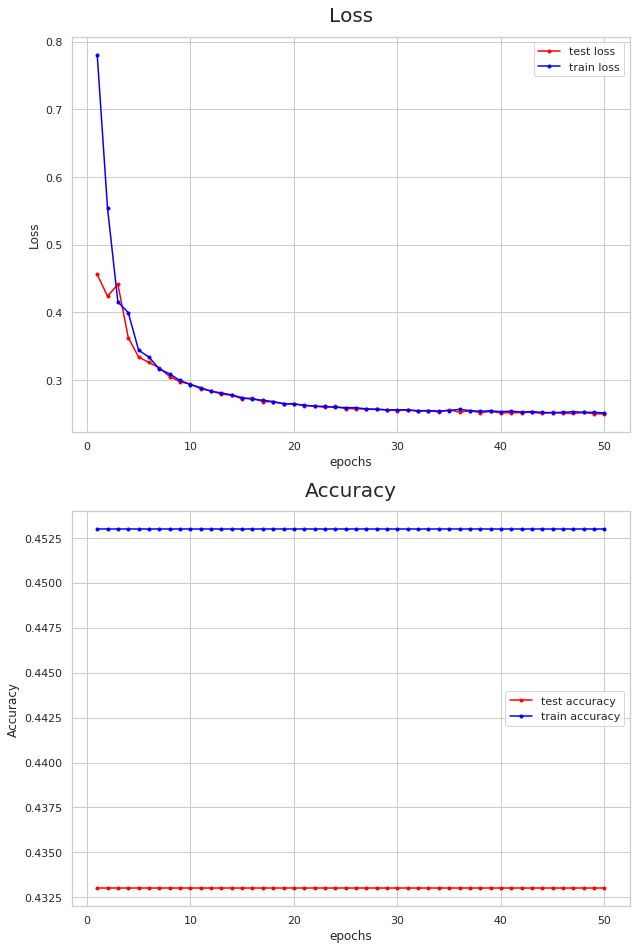

In [7]:
history.plot()